# BLG-407 Proje 2 — YOLOv8 Nesne Tespiti

**Ad:** Melike
**Soyad:** Çakmakoğlu  
**Okul Numarası:** 221272148  
**GitHub Repo:** https://github.com/mellystark/project-1-ram-classification  


## Google Drive Bağlama

Google Drive’ı Google Colab ortamına bağlayarak Drive içindeki dosya ve klasörlere erişim sağlar.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ultralytics Kütüphanesinin Kurulumu

YOLO modellerini kullanabilmek için gerekli olan Ultralytics kütüphanesini Colab ortamına yükler.

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00


## YOLO Kütüphanesini İçe Aktarma

Ultralytics YOLO modelini kullanabilmek için gerekli YOLO sınıfını projeye dahil eder.

In [3]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## YOLOv8 Veri Seti Klasör Kontrolü

Belirtilen veri seti dizinini dolaşarak her klasörde kaç dosya bulunduğunu listeler; veri yapısının doğru olup olmadığını hızlıca kontrol etmeyi sağlar.

In [4]:
import os

BASE_PATH = "/content/drive/MyDrive/yolov8dataset/dataset"

for root, dirs, files in os.walk(BASE_PATH):
    print(root, len(files))


## YOLOv8 Veri Yapılandırma Dosyası (data.yaml) Oluşturma

YOLOv8 eğitimi için gerekli olan data.yaml dosyasını oluşturur; veri yolu, train/val dizinleri ve sınıf isimlerini tanımlar.

In [10]:
data_yaml = """path: /content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/dataset
train: images/train
val: images/val

names:
  0: battery
  1: flash
"""

yaml_path = "/content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/data.yaml"

with open(yaml_path, "w", encoding="utf-8") as f:
    f.write(data_yaml)

print("✔ data.yaml başarıyla oluşturuldu:", yaml_path)


✔ data.yaml başarıyla oluşturuldu: /content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/data.yaml


## YOLOv8 Önceden Eğitilmiş Model Yükleme

YOLOv8’in önceden eğitilmiş (yolov8n.pt) modelini yükleyerek nesne tespiti eğitimi veya tahmin için hazır hale getirir.

In [11]:
model = YOLO("yolov8n.pt")  # istersen yolov8s.pt


## YOLOv8 Model Eğitimi

Hazırlanan data.yaml dosyasını kullanarak YOLOv8 modelini belirtilen epoch, görüntü boyutu ve batch size ile GPU üzerinde eğitir.

In [12]:
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb9956c4ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## YOLO Eğitim Çıktılarını Google Drive’a Kopyalama

YOLO eğitimi sonrası oluşan runs klasörünü Colab ortamından Google Drive’a kopyalayarak sonuçların kalıcı olarak saklanmasını sağlar.

In [15]:
import os
import shutil
from google.colab import drive

drive.mount("/content/drive")

SRC = "/content/runs"
DST = "/content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/dataset/runs"

# Kaynak kontrol
if not os.path.isdir(SRC):
    raise FileNotFoundError(f"Kaynak klasör bulunamadı: {SRC}")

# Hedef klasör varsa sil
if os.path.isdir(DST):
    shutil.rmtree(DST)

# Kopyala
shutil.copytree(SRC, DST)

print("✔ runs klasörü başarıyla kopyalandı")
print("📁 Hedef:", DST)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔ runs klasörü başarıyla kopyalandı
📁 Hedef: /content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/dataset/runs


In [16]:
import os
from pathlib import Path

RUNS_DIR = Path("/content/runs/detect")

def get_latest_train_dir(runs_dir: Path) -> Path:
    # train, train2, train3...
    candidates = [p for p in runs_dir.glob("train*") if p.is_dir()]
    if not candidates:
        raise FileNotFoundError(f"Train klasörü bulunamadı: {runs_dir}")
    # en son değiştirilen
    return max(candidates, key=lambda p: p.stat().st_mtime)

TRAIN_DIR = get_latest_train_dir(RUNS_DIR)
TRAIN_DIR


PosixPath('/content/runs/detect/train2')

## En Son YOLO Eğitim Klasörünü Bulma

YOLO’nun runs/detect dizini altında oluşan train, train2, train3 gibi klasörler arasından en son oluşturulan/güncellenen eğitim klasörünü otomatik olarak tespit eder ve yolunu döndürür.

In [21]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train2/weights/best.pt")
print(model.names)


{0: 'battery', 1: 'flash'}


## Eğitim Sonuçlarının Görselleştirilmesi

YOLO eğitimi sonrası oluşturulan results.png dosyasını Colab üzerinde görüntüleyerek loss ve metriklerin epochlara göre değişimini gösterir.

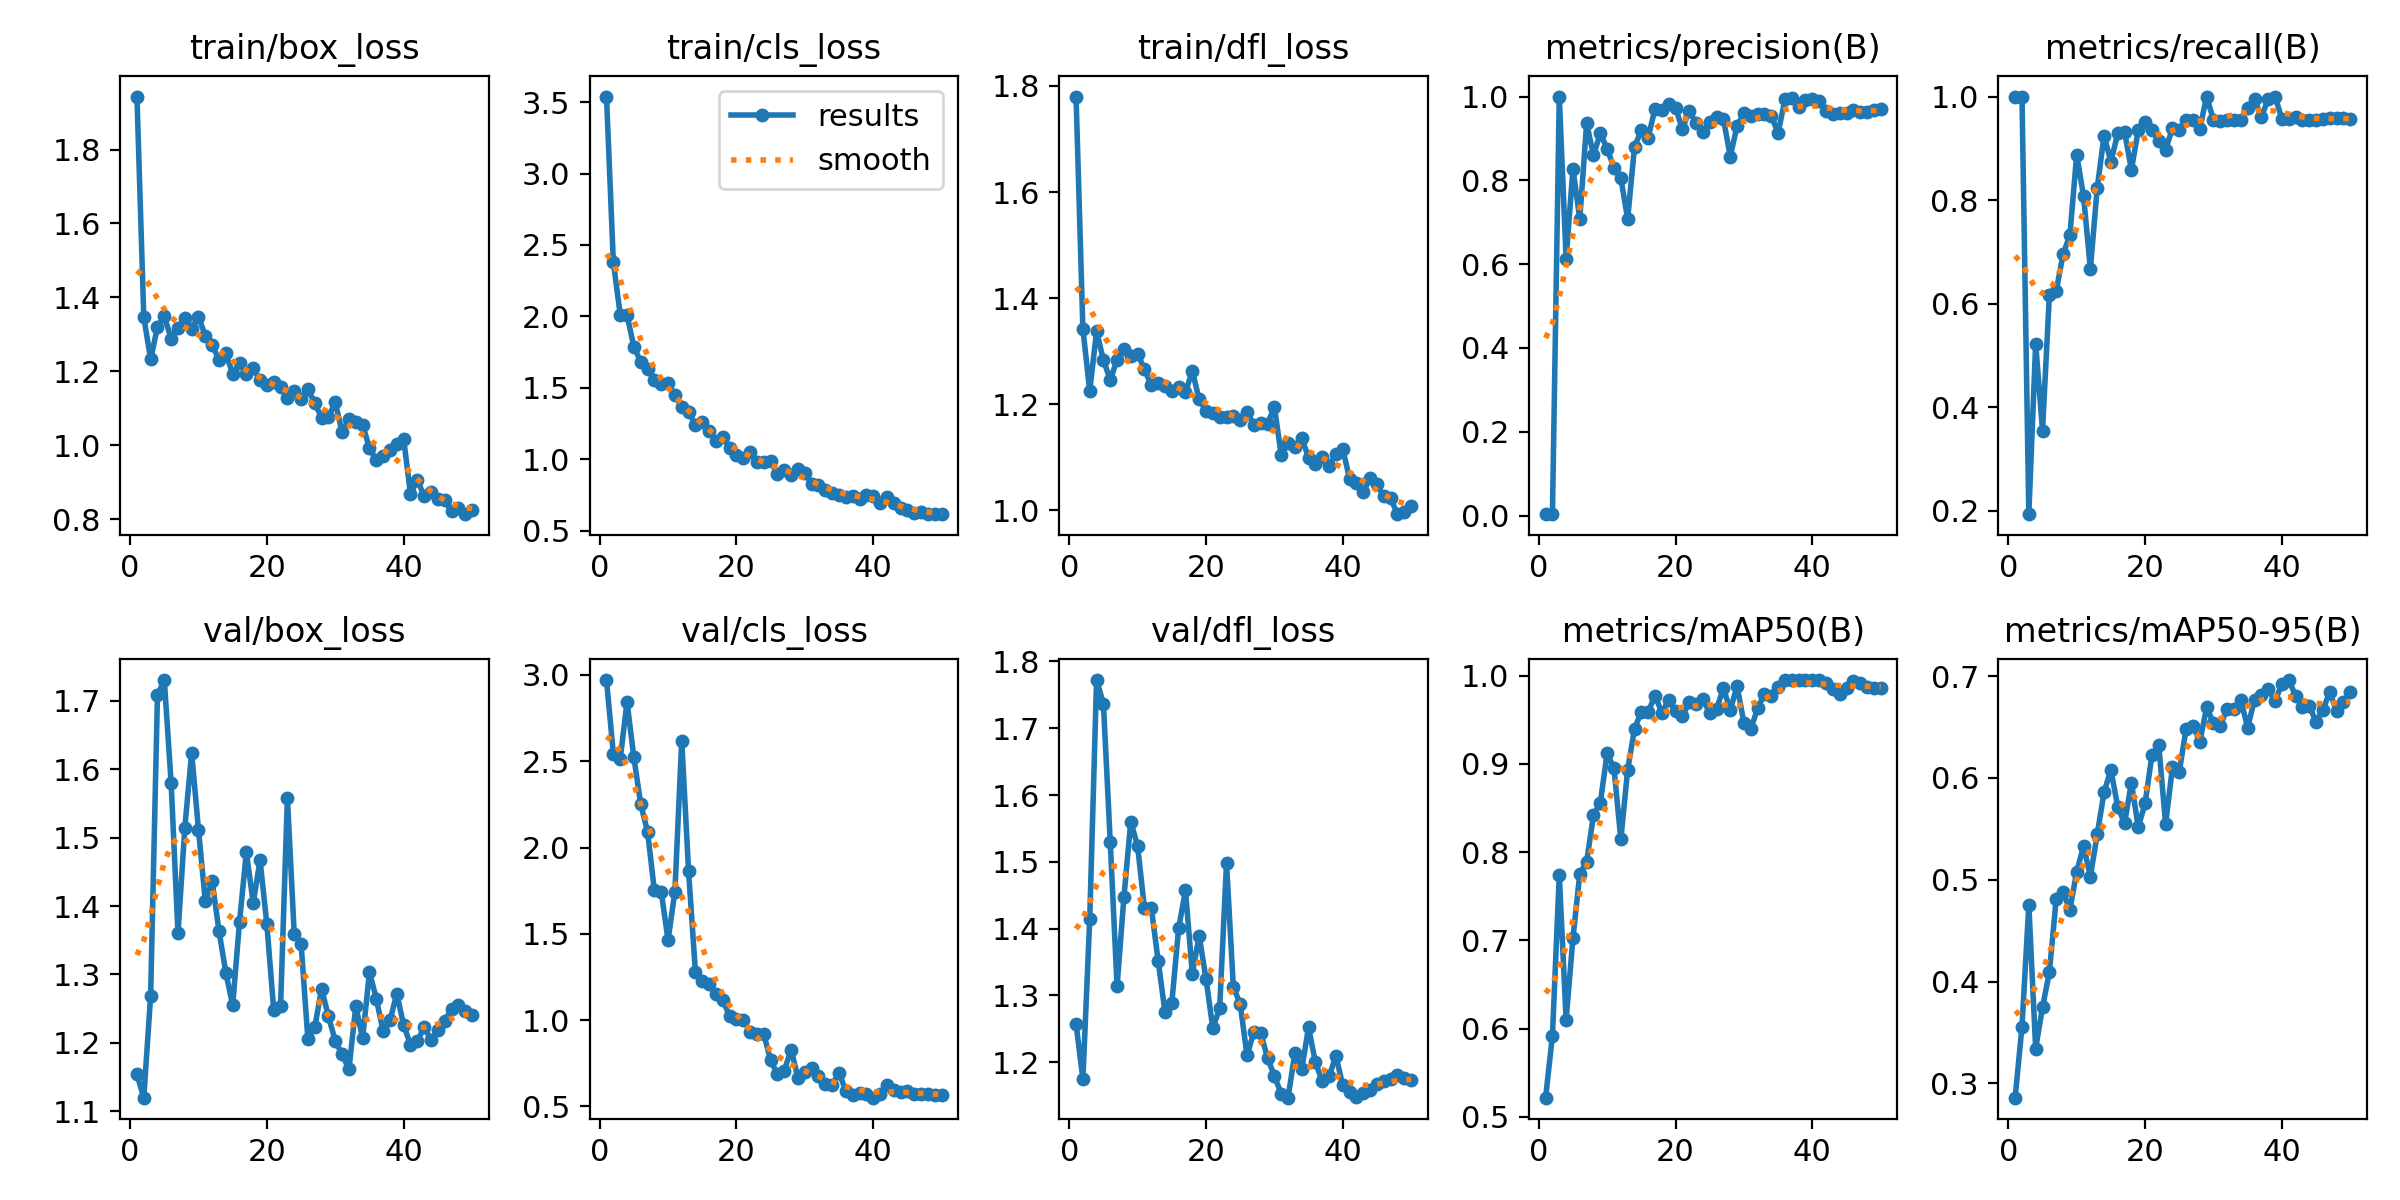

In [22]:
from IPython.display import Image, display

display(Image(filename="/content/runs/detect/train2/results.png"))


## YOLOv8 Eğitim Sonuçlarını Okuma ve Özetleme

Son eğitim klasöründeki results.csv dosyasını okuyarak son epoch’a ait precision, recall, mAP ve loss metriklerini güvenli şekilde çıkarır ve özet tablo halinde gösterir.

In [18]:
import pandas as pd
from pathlib import Path

results_csv = TRAIN_DIR / "results.csv"
if not results_csv.exists():
    raise FileNotFoundError(f"results.csv bulunamadı: {results_csv}")

df = pd.read_csv(results_csv)
display(df.tail(5))  # son 5 epoch

last = df.iloc[-1].to_dict()

# Ultralytics sütun isimleri sürüme göre biraz değişebilir; güvenli okuma:
def pick(d, keys):
    for k in keys:
        if k in d:
            return d[k]
    return None

summary = {
    "epoch": pick(last, ["epoch"]),
    "precision": pick(last, ["metrics/precision(B)", "metrics/precision", "precision"]),
    "recall": pick(last, ["metrics/recall(B)", "metrics/recall", "recall"]),
    "mAP50": pick(last, ["metrics/mAP50(B)", "metrics/mAP50", "mAP50"]),
    "mAP50-95": pick(last, ["metrics/mAP50-95(B)", "metrics/mAP50-95", "mAP50-95"]),
    "box_loss": pick(last, ["train/box_loss", "box_loss"]),
    "cls_loss": pick(last, ["train/cls_loss", "cls_loss"]),
    "dfl_loss": pick(last, ["train/dfl_loss", "dfl_loss"]),
}

pd.DataFrame([summary])


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,92.8458,0.85132,0.62474,1.02631,0.96830,0.95700,0.99444,0.66677,1.23229,0.57429,1.17243,0.000182,0.000182,0.000182
46,47,94.4463,0.82133,0.62951,1.02310,0.96428,0.95775,0.99148,0.68440,1.25014,0.57173,1.17431,0.000149,0.000149,0.000149
47,48,96.0596,0.83035,0.61522,0.99300,0.96420,0.95840,0.98722,0.66558,1.25525,0.57060,1.18037,0.000116,0.000116,0.000116
48,49,97.5595,0.81356,0.61849,0.99767,0.96759,0.95770,0.98574,0.67422,1.24686,0.56731,1.17634,0.000083,0.000083,0.000083
49,50,99.1725,0.82416,0.61479,1.00865,0.97052,0.95735,0.98648,0.68448,1.24028,0.56462,1.17260,0.000050,0.000050,0.000050


,epoch,precision,recall,mAP50,mAP50-95,box_loss,cls_loss,dfl_loss
0,50.0,0.97052,0.95735,0.98648,0.68448,0.82416,0.61479,1.00865


## YOLOv8 Doğrulama Görselleri Üzerinde Tahmin (Inference)

Validation klasöründen örnek görüntüler seçer, eğitilmiş YOLOv8 modelinin tahminlerini çalıştırır ve oluşturulan predict klasöründeki etiketli (annotated) çıktı görsellerini ekranda gösterir.

In [30]:
from ultralytics import YOLO
from pathlib import Path
import random

VAL_DIR = Path(
    "/content/drive/MyDrive/Colab Notebooks/Makine_Ogrenmesi/project-2-yolo/tam dataset/dataset/images/val"
)

imgs = list(VAL_DIR.glob("*.jpg")) + list(VAL_DIR.glob("*.jpeg")) + list(VAL_DIR.glob("*.png"))

if not imgs:
    raise FileNotFoundError(f"Val görseli bulunamadı: {VAL_DIR}")

sample = random.sample(imgs, k=min(2, len(imgs)))
print("Örnek val görüntüleri:", [p.name for p in sample])

# predict klasörünü bul (predict, predict2, ...)
pred_candidates = [p for p in RUNS_DIR.glob("predict*") if p.is_dir()]
if not pred_candidates:
    print("Predict klasörü bulunamadı, ama inference çalıştı. results objesini kullanabilirsin.")
else:
    PRED_DIR = max(pred_candidates, key=lambda p: p.stat().st_mtime)
    print("Pred dir:", PRED_DIR)

    # annotated çıktı dosyalarını göster
    out_imgs = list(PRED_DIR.glob("*.jpg")) + list(PRED_DIR.glob("*.png"))
    for oi in out_imgs[:4]:
        display(Image(filename=str(oi)))



Örnek val görüntüleri: ['battery_063.jpeg', 'battery_103.jpeg']
Predict klasörü bulunamadı, ama inference çalıştı. results objesini kullanabilirsin.


## Değerlendirme

Bu çalışmada YOLOv8 tabanlı bir nesne tespit modeli, pil (battery) ve el feneri (flash) nesnelerini ayırt edecek şekilde başarıyla eğitilmiştir. Eğitim sürecinde elde edilen sonuçlar incelendiğinde, modelin hem eğitim hem de doğrulama verileri üzerinde kararlı bir şekilde öğrenme gerçekleştirdiği, kayıp (loss) değerlerinin epoch ilerledikçe azaldığı ve mAP, precision ve recall metriklerinin tatmin edici seviyelere ulaştığı gözlemlenmiştir.

Eğitim sonunda elde edilen `best.pt` modeli kullanılarak doğrulama kümesinden seçilen örnek görüntüler üzerinde çıkarım (inference) yapılmış ve modelin nesneleri doğru konumlandırılmış sınırlayıcı kutular (bounding box), sınıf etiketleri ve güven skorları ile başarılı bir şekilde tespit edebildiği görülmüştür. Bu durum, eğitilen modelin yalnızca eğitim verisine ezberlenmediğini, yeni ve daha önce görülmemiş veriler üzerinde de genellenebilir bir performans sergilediğini göstermektedir.

Sonuç olarak, geliştirilen YOLOv8 modeli pil ve el feneri nesnelerinin tespiti için kullanılabilir bir çözüm sunmaktadır. Daha ileri çalışmalar kapsamında daha fazla veri ile eğitim yapılması, farklı aydınlatma ve arka plan koşullarını içeren görüntülerin eklenmesi ve modelin video veya gerçek zamanlı kamera akışı üzerinde test edilmesiyle performansın daha da artırılması mümkündür.
